## Exercise 1

Consider the following bivariate distribution:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

freq = [[0.1,0.1,0.],[0.2,0.,0.2],[0.3,0.1,0.]]

plt.clf()
plt.imshow(freq, interpolation='nearest', cmap=plt.cm.Wistia)
X_values = ['1','2','3']
Y_values = ['5','10','15']
plt.ylabel('Y')
plt.xlabel('X') 
plt.title('P(X,Y)') 
plt.xticks(np.arange(len(X_values)), X_values, rotation=45)
plt.yticks(np.arange(len(Y_values)), Y_values)
for i in range(len(X_values)):
    for j in range(len(Y_values)):
        plt.text(j,i, str(freq[i][j]))
plt.show()

<Figure size 640x480 with 1 Axes>

**1) Show that P(X,Y) is a valid distribution function.**

**2) Show that X and Y are not independent.**

**3) Find the marginal distribution of X.**

**4) Find P(X=2 | Y < 15).**

## Exercise 2

Let's suppose the following joint probability distribution is known for a medicine:

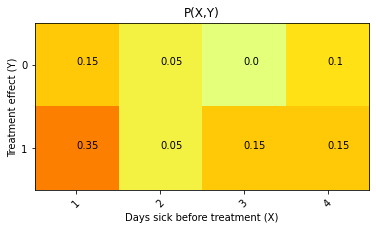

In [3]:
freq = [[0.15,0.05,0., 0.1],[0.35,0.05,0.15,0.15]]

plt.clf()
plt.imshow(freq, interpolation='nearest', cmap=plt.cm.Wistia)
X_values = ['1','2','3','4']
Y_values = ['0','1']
plt.ylabel('Treatment effect (Y)')
plt.xlabel('Days sick before treatment (X)') 
plt.title('P(X,Y)') 
plt.xticks(np.arange(len(X_values)), X_values, rotation=45)
plt.yticks(np.arange(len(Y_values)), Y_values)
for i in range(len(X_values)):
    for j in range(len(Y_values)):
        plt.text(i,j, str(freq[j][i]))
plt.show()

Let Y represent the treatment outcome (0 = not recovered, 1 = recovered) and X represent the number of days sick before treatment. Find:

**1) P(Y=1)**

**2) P(Y=1 | X=3)**

**3) P(Y=1 | X>=3)**

**4) P(X=2 | Y=0)**

**5) P(X<=2 | Y=0)**

## Exercise 3

A hospital has 5 ambulances, two of them have one bed inside while the rest have two beds inside. Let X = number of two beds ambulances used on any given day and Y = number of one bed ambulances used on any given day.

Suppose the joint probability of X and Y is as follows:

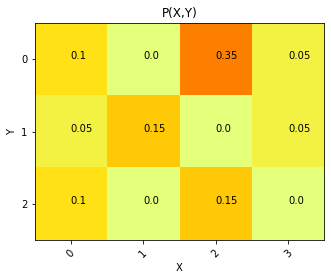

In [4]:
freq = [[0.1,0.0,0.35, 0.05],[0.05,0.15,0.,0.05],[0.10, 0.0, 0.15,0.0]]

plt.clf()
plt.imshow(freq, interpolation='nearest', cmap=plt.cm.Wistia)
X_values = ['0','1','2','3']
Y_values = ['0','1', '2']
plt.ylabel('Y')
plt.xlabel('X') 
plt.title('P(X,Y)') 
plt.xticks(np.arange(len(X_values)), X_values, rotation=45)
plt.yticks(np.arange(len(Y_values)), Y_values)
for i in range(len(X_values)):
    for j in range(len(Y_values)):
        plt.text(i,j, str(freq[j][i]))
plt.show()

Find the probability that, on any given day:

**1) None of the ambulances are hired.**

**2) All of the one bed ambulances are hired**

**3) At least 2 of the ambulances are hired.**

**4) All of the one bed ambulances are hired, if all the 2 beds ambulances have been hired.
Compare your answer to (2) and reason whether X and Y are independent.**

## Exercise 4

Let's consider the following data:

(2, 352)


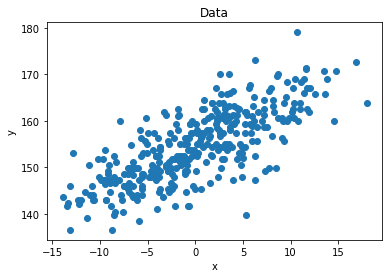

In [6]:
import pandas as pd
%run ./tools.py

data = np.load('./data_exercise4.npy')
print(data.shape)
x = data[0,:] - np.mean(data[0,:])
y = data[1,:]

plt.scatter(x,y)
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

df = pd.DataFrame({'x':x, 'y':y})

According to the plot above, a linear relationship seems to exist between x and y. Therefore, we model the data according to $y_i = \mathcal{N}(\mu_i, \sigma^{2})$ with $\mu_i = a + b*x_i$. We find a posterior distribution for the parameters a, b and $\sigma^{2}$ using a Laplace approximation.

In [9]:
expr = 'y ~ x'

# Initializing the likelihood
likelihood = 'gaussian'

# Defining the prior with hyperparameters 
prior_a_mean = 10
prior_a_sigma = 1
prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

prior_b_mean = 0
prior_b_sigma = 1
prior_b = ['gaussian', [prior_b_mean, prior_b_sigma]]

sigma_inf = 20
sigma_sup = 50
prior_sigma_unif = [sigma_inf, sigma_sup]
prior_sigma = ['uniform', prior_sigma_unif]

priors = [prior_a, prior_b, prior_sigma]

solution_regression = laplace_solution_regression(expr, df, likelihood, priors)

/Users/mlorenzi/miniconda3/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 2609.7813821544673
 hess_inv: array([[ 0.88801225,  0.02251306, -0.19055903],
       [ 0.02251306,  0.19746585, -0.03667461],
       [-0.19055903, -0.03667461,  0.65080894]])
      jac: array([  0.26922607, -23.40856934, -15.9675293 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 58
      nit: 3
     njev: 13
   status: 2
  success: False
        x: array([20.24490019, -5.04454762, 68.85316722])


**1) Examine the posterior distribution for the regression parameters, and decide if the solution is correct or not.**

**2) In case there is any problem with the model, modify the code above in order to get a proper solution**

## Exercise 5

Consider the following function on the interval [0, 3]:

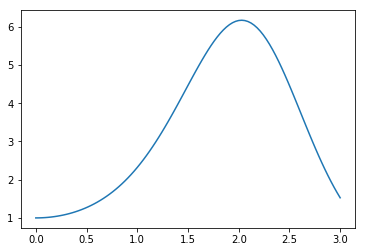

In [66]:
x = np.linspace(0., 3., 100.)
f = np.exp(x*np.sin(x))

plt.plot(x, f)
plt.show()

**1) Approximate this function using the Laplace approximation.**

**2) Plot the original function and your approximation on the same graph.**

## Exercise 6

From the file grades.csv we are interested in predicting the final evaluation score from the midterm one. 

- (6.1) Find appropriate priors for a linear model. Sample from the priors to verify that the choice of all the priors parameters is compatible with the regression problem
- (6.2) Fit a regression model using these priors (you can use either our Laplace implementation or Stan)
- (6.3) Sample from the posterior and plot the related regression function. Is this simulation compatible with the observations?
- (6.4) Compute the standard deviation for the final score of a student with midterm score of 60.



## Exercise 7

From the exercise above, fit a quadratic model and compare it to the linear one for this regression problem.

## Exercise 8

The file *cbb.csv* contains the results from last Division I college basketball seasons (2016 to 2019). We are going to focus on the results of season 2018.
The variables that we investigate are the following:

- G: Number of games played

- W: Number of games won

- ADJOE: Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)

- ADJDE: Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)

Questions:

- (8.1) What is a reasonable likelihood function to mode the probability of victory as a function of ADJOE? 
- (8.2) According to your reply to question 8.1, fit a model for the probability of victory as a function of ADJOE;
- (8.3) Plot the predictions against the data, and verify that the model gives you plausible results;
- (8.4) Find a 95% confidence interval for the difference victory probability between a team with average ADJOE and one with 10 point increase;
- (8.5) Find a 95% confidence interval for the difference between the victory probabilities for a team with average ADJOE, and one with 10 point decrease
- (8.6) Do you expect the difference in (8.4) to be the same of (8.5)? Explain. 



In [11]:
import pandas as pd
import matplotlib.pyplot as plt
cbb = pd.read_csv('cbb.csv')
cbb = cbb[cbb.YEAR == 2018]
cbb

TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
2          Michigan  B10  40  33  114.4   90.4   0.9375   53.9   47.7  14.0   
9         Villanova   BE  40  36  128.4   94.1   0.9725   59.5   48.5  15.0   
14             Duke  ACC  37  29  122.3   92.9   0.9592   55.9   46.4  17.5   
15      Florida St.  ACC  35  23  113.2   96.4   0.8631   53.2   48.4  17.8   
20       Kansas St.  B12  37  25  109.6   93.7   0.8584   52.6   49.1  17.2   
...             ...  ...  ..  ..    ...    ...      ...    ...    ...   ...   
1740  West Virginia  B12  37  26  120.9   95.8   0.9353   50.4   49.9  16.5   
1744         Nevada  MWC  37  29  118.9  102.5   0.8462   54.8   49.4  13.5   
1751       Kentucky  SEC  37  26  115.8   95.6   0.9000   51.8   46.8  18.6   
1752      Texas A&M  SEC  35  22  111.2   94.7   0.8640   51.4   46.9  19.2   
1756        Gonzaga  WCC  37  32  117.2   94.9   0.9192   57.0   47.1  16.1   

      ...  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  POSTSEASON  SEED  YEAR  
2     ...  30.0  54.7  46.8  35.2  33.2   65.9   6.9         2ND   3.0  2018  
9     ...  26.7  59.0  49.0  40.1  31.7   69.6  10.6   Champions   1.0  2018  
14    ...  22.3  56.0  45.4  37.2  32.0   70.9   6.6          E8   2.0  2018  
15    ...  32.4  53.6  45.4  35.0  35.5   72.5   0.9          E8   9.0  2018  
20    ...  36.8  53.4  48.9  34.1  33.0   66.5   2.5          E8   9.0  2018  
...   ...   ...   ...   ...   ...   ...    ...   ...         ...   ...   ...  
1740  ...  44.1  48.8  45.4  35.3  38.0   71.2   4.6         S16   5.0  2018  
1744  ...  30.1  52.1  50.7  39.2  31.7   70.7   2.5         S16   7.0  2018  
1751  ...  32.3  51.2  48.0  35.7  30.1   70.0   4.3         S16   5.0  2018  
1752  ...  27.6  52.5  45.7  32.9  32.6   70.3   1.9         S16   7.0  2018  
1756  ...  29.1  58.2  44.1  36.8  35.0   70.5   4.9         S16   4.0  2018  

[351 rows x 24 columns]